In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
import os

pd.pandas.set_option("display.max_columns",None)
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/data_oversame.csv
./data/Heart.csv


In [4]:
data = pd.read_csv('./data/data_oversame.csv')
data = data.dropna()
target = 'TenYearCHD'
X = data.drop(target,1)
y = data[target]


In [5]:
from sklearn.model_selection import train_test_split

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.3,random_state=26)

In [17]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [27]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [70]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain, ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [71]:
rf_random.best_params_


{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [57]:
error = []
test_r = range(2,50)
for i in test_r:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    score = knn.score(xtest,ytest)
    pred = knn.predict(xtest)
    error.append(np.mean(pred != ytest))
    

Text(0, 0.5, 'Error Rate')

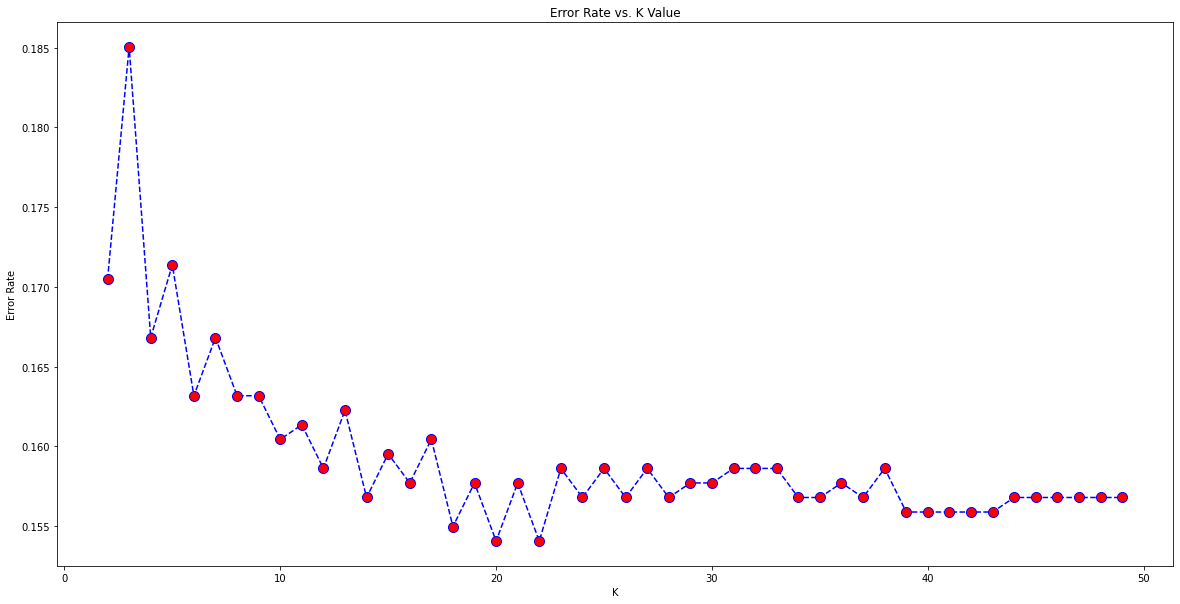

In [62]:
plt.figure(figsize=(20,10))
plt.plot(test_r,error,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [80]:
models = [LogisticRegression(),
          RidgeClassifier(),
          RandomForestClassifier(),
          RandomForestClassifier(n_estimators = 1600,
                                 min_samples_split = 10,
                                 min_samples_leaf = 1,
                                 max_features = 'sqrt',
                                 max_depth = 20,
                                 bootstrap = True),
          AdaBoostClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(n_neighbors=22),
         KNeighborsClassifier(n_neighbors=3)]

In [81]:
best = ()
best_score = 0
for model in models:
    model.fit(xtrain,ytrain)
    score = model.score(xtest,ytest)
    if score > best_score:
        best = (model, score)
        best_score = score
    print(model,score)
print(best)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() 0.8404740200546946
RidgeClassifier() 0.8422971741112124
RandomForestClassifier() 0.8404740200546946
RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_split=10,
                       n_estimators=1600) 0.8404740200546946
AdaBoostClassifier() 0.8368277119416591
DecisionTreeClassifier() 0.7547857793983591
KNeighborsClassifier(n_neighbors=22) 0.845943482224248
KNeighborsClassifier(n_neighbors=3) 0.8149498632634458
(KNeighborsClassifier(n_neighbors=22), 0.845943482224248)


In [86]:
model = best[0]
pred = model.predict(xtest)

In [91]:
from sklearn.metrics import classification_report,confusion_matrix

In [89]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       925
           1       0.67      0.03      0.07       172

    accuracy                           0.85      1097
   macro avg       0.76      0.52      0.49      1097
weighted avg       0.82      0.85      0.78      1097



In [98]:
cm = confusion_matrix(ytest,pred)

<AxesSubplot:>

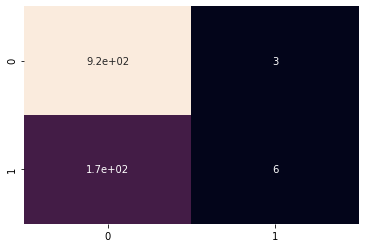

In [101]:
sns.heatmap(cm,annot=True,cbar=False)